In [ ]:
!pip install tensorflow_data_validation

In [1]:
# Import dependencies
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import tensorflow_data_validation as tfdv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from datetime import datetime
import calendar
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
base_dir = './drive/MyDrive/Colab Notebooks/smart-meters-in-london'

In [4]:
# Read daily weather data
df_weather = pd.read_csv(os.path.join(base_dir, "weather_data/weather_daily_darksky.csv"))

In [5]:
df_weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00,4.37,5.32,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


## Weather data analysis

In [6]:
# Generate data statistics
weather_stats = tfdv.generate_statistics_from_dataframe(df_weather)
tfdv.visualize_statistics(weather_stats)

In [ ]:
# Generate data schema
weather_schema = tfdv.infer_schema(statistics=weather_stats)
tfdv.display_schema(weather_schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'temperatureMax',FLOAT,required,,-
'temperatureMaxTime',BYTES,required,,-
'windBearing',INT,required,,-
'icon',STRING,required,,'icon'
'dewPoint',FLOAT,required,,-
'temperatureMinTime',BYTES,required,,-
'cloudCover',FLOAT,optional,single,-
'windSpeed',FLOAT,required,,-
'pressure',FLOAT,required,,-


Values
Domain                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# Color Palette
colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

# Dataset Columns
feature_keys = [
    "temperatureMax",
    "windBearing",
    "dewPoint",
    "cloudCover", 
    "windSpeed", 
    "pressure", 
    "apparentTemperatureHigh", 
    "visibility", 
    "humidity",
    "apparentTemperatureLow",
    "apparentTemperatureMax",
    "uvIndex",
    "temperatureLow",
    "temperatureMin",
    "temperatureHigh",
    "apparentTemperatureMin",
    "moonPhase"
]

# Plots each column as a time series
def visualize_plots(dataset, columns):
    features = dataset[columns]
    fig, axes = plt.subplots(
        nrows=len(columns)//2 + len(columns)%2, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i, col in enumerate(columns):
        c = colors[i % (len(colors))]
        t_data = dataset[col]
        t_data.index = dataset.index
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(col),
            rot=25,
        )
    ax.legend([col])
    plt.tight_layout()

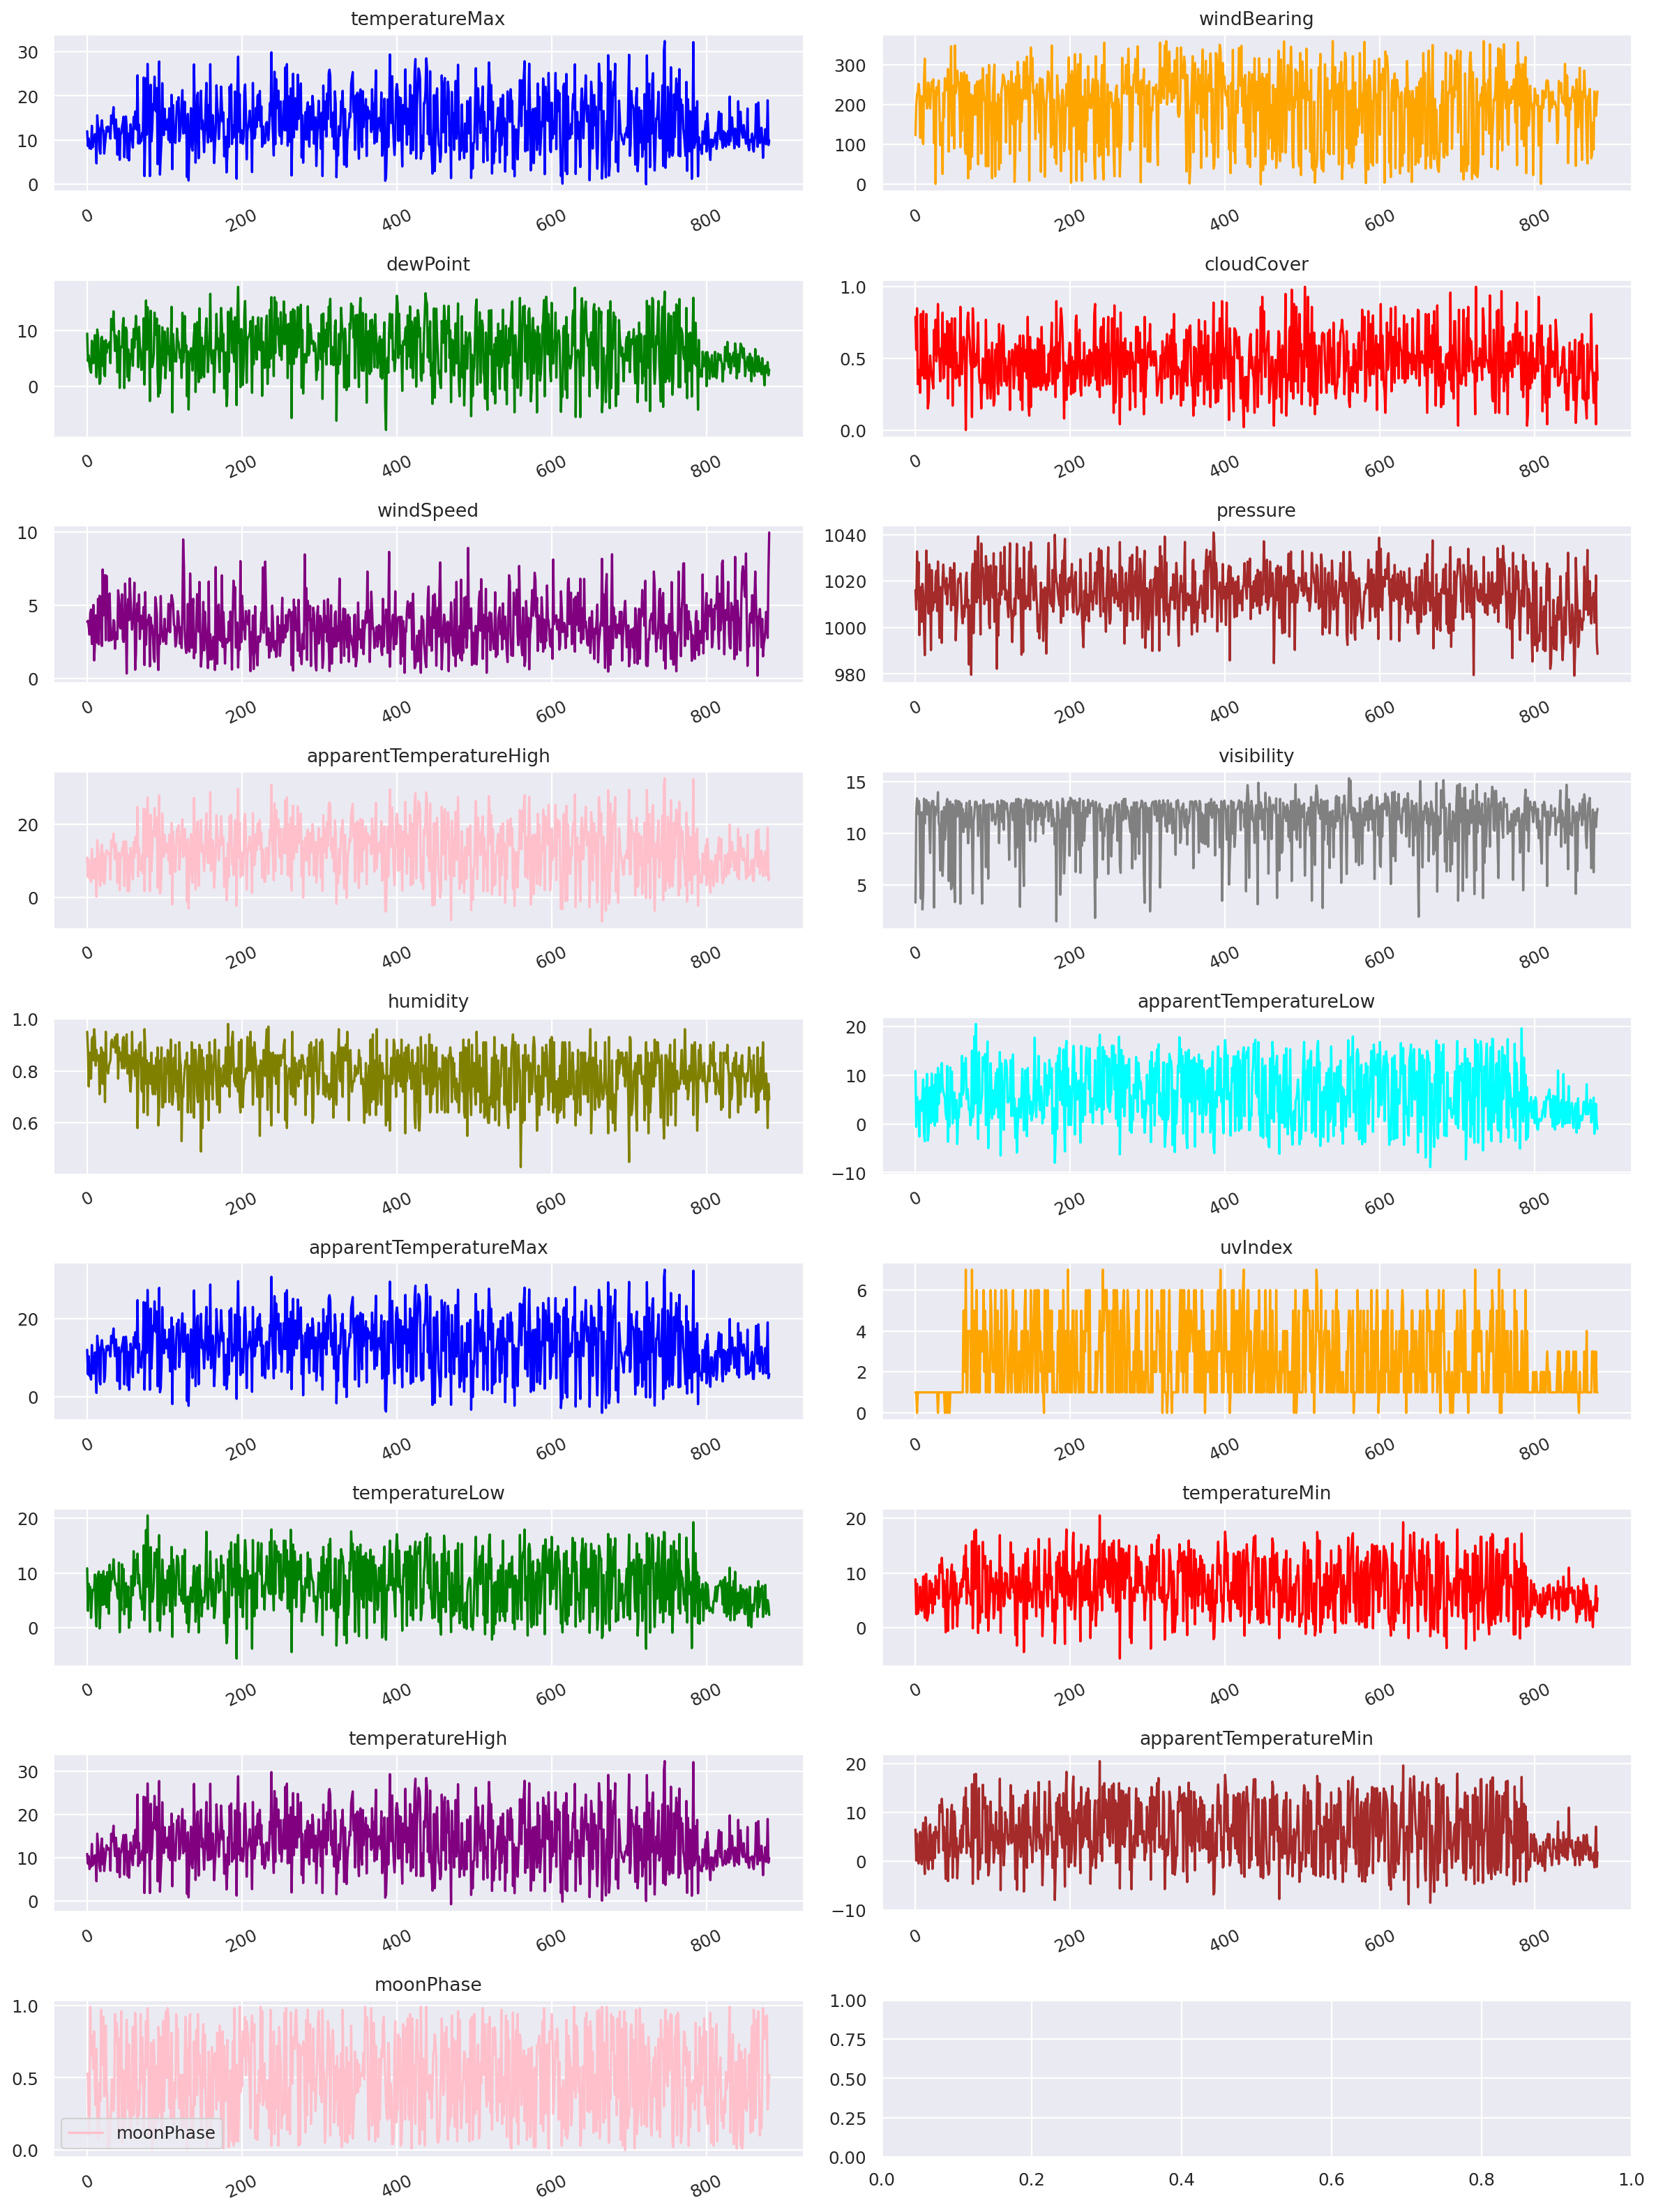

In [ ]:
# Plot numeric features time series
visualize_plots(df_weather, feature_keys)

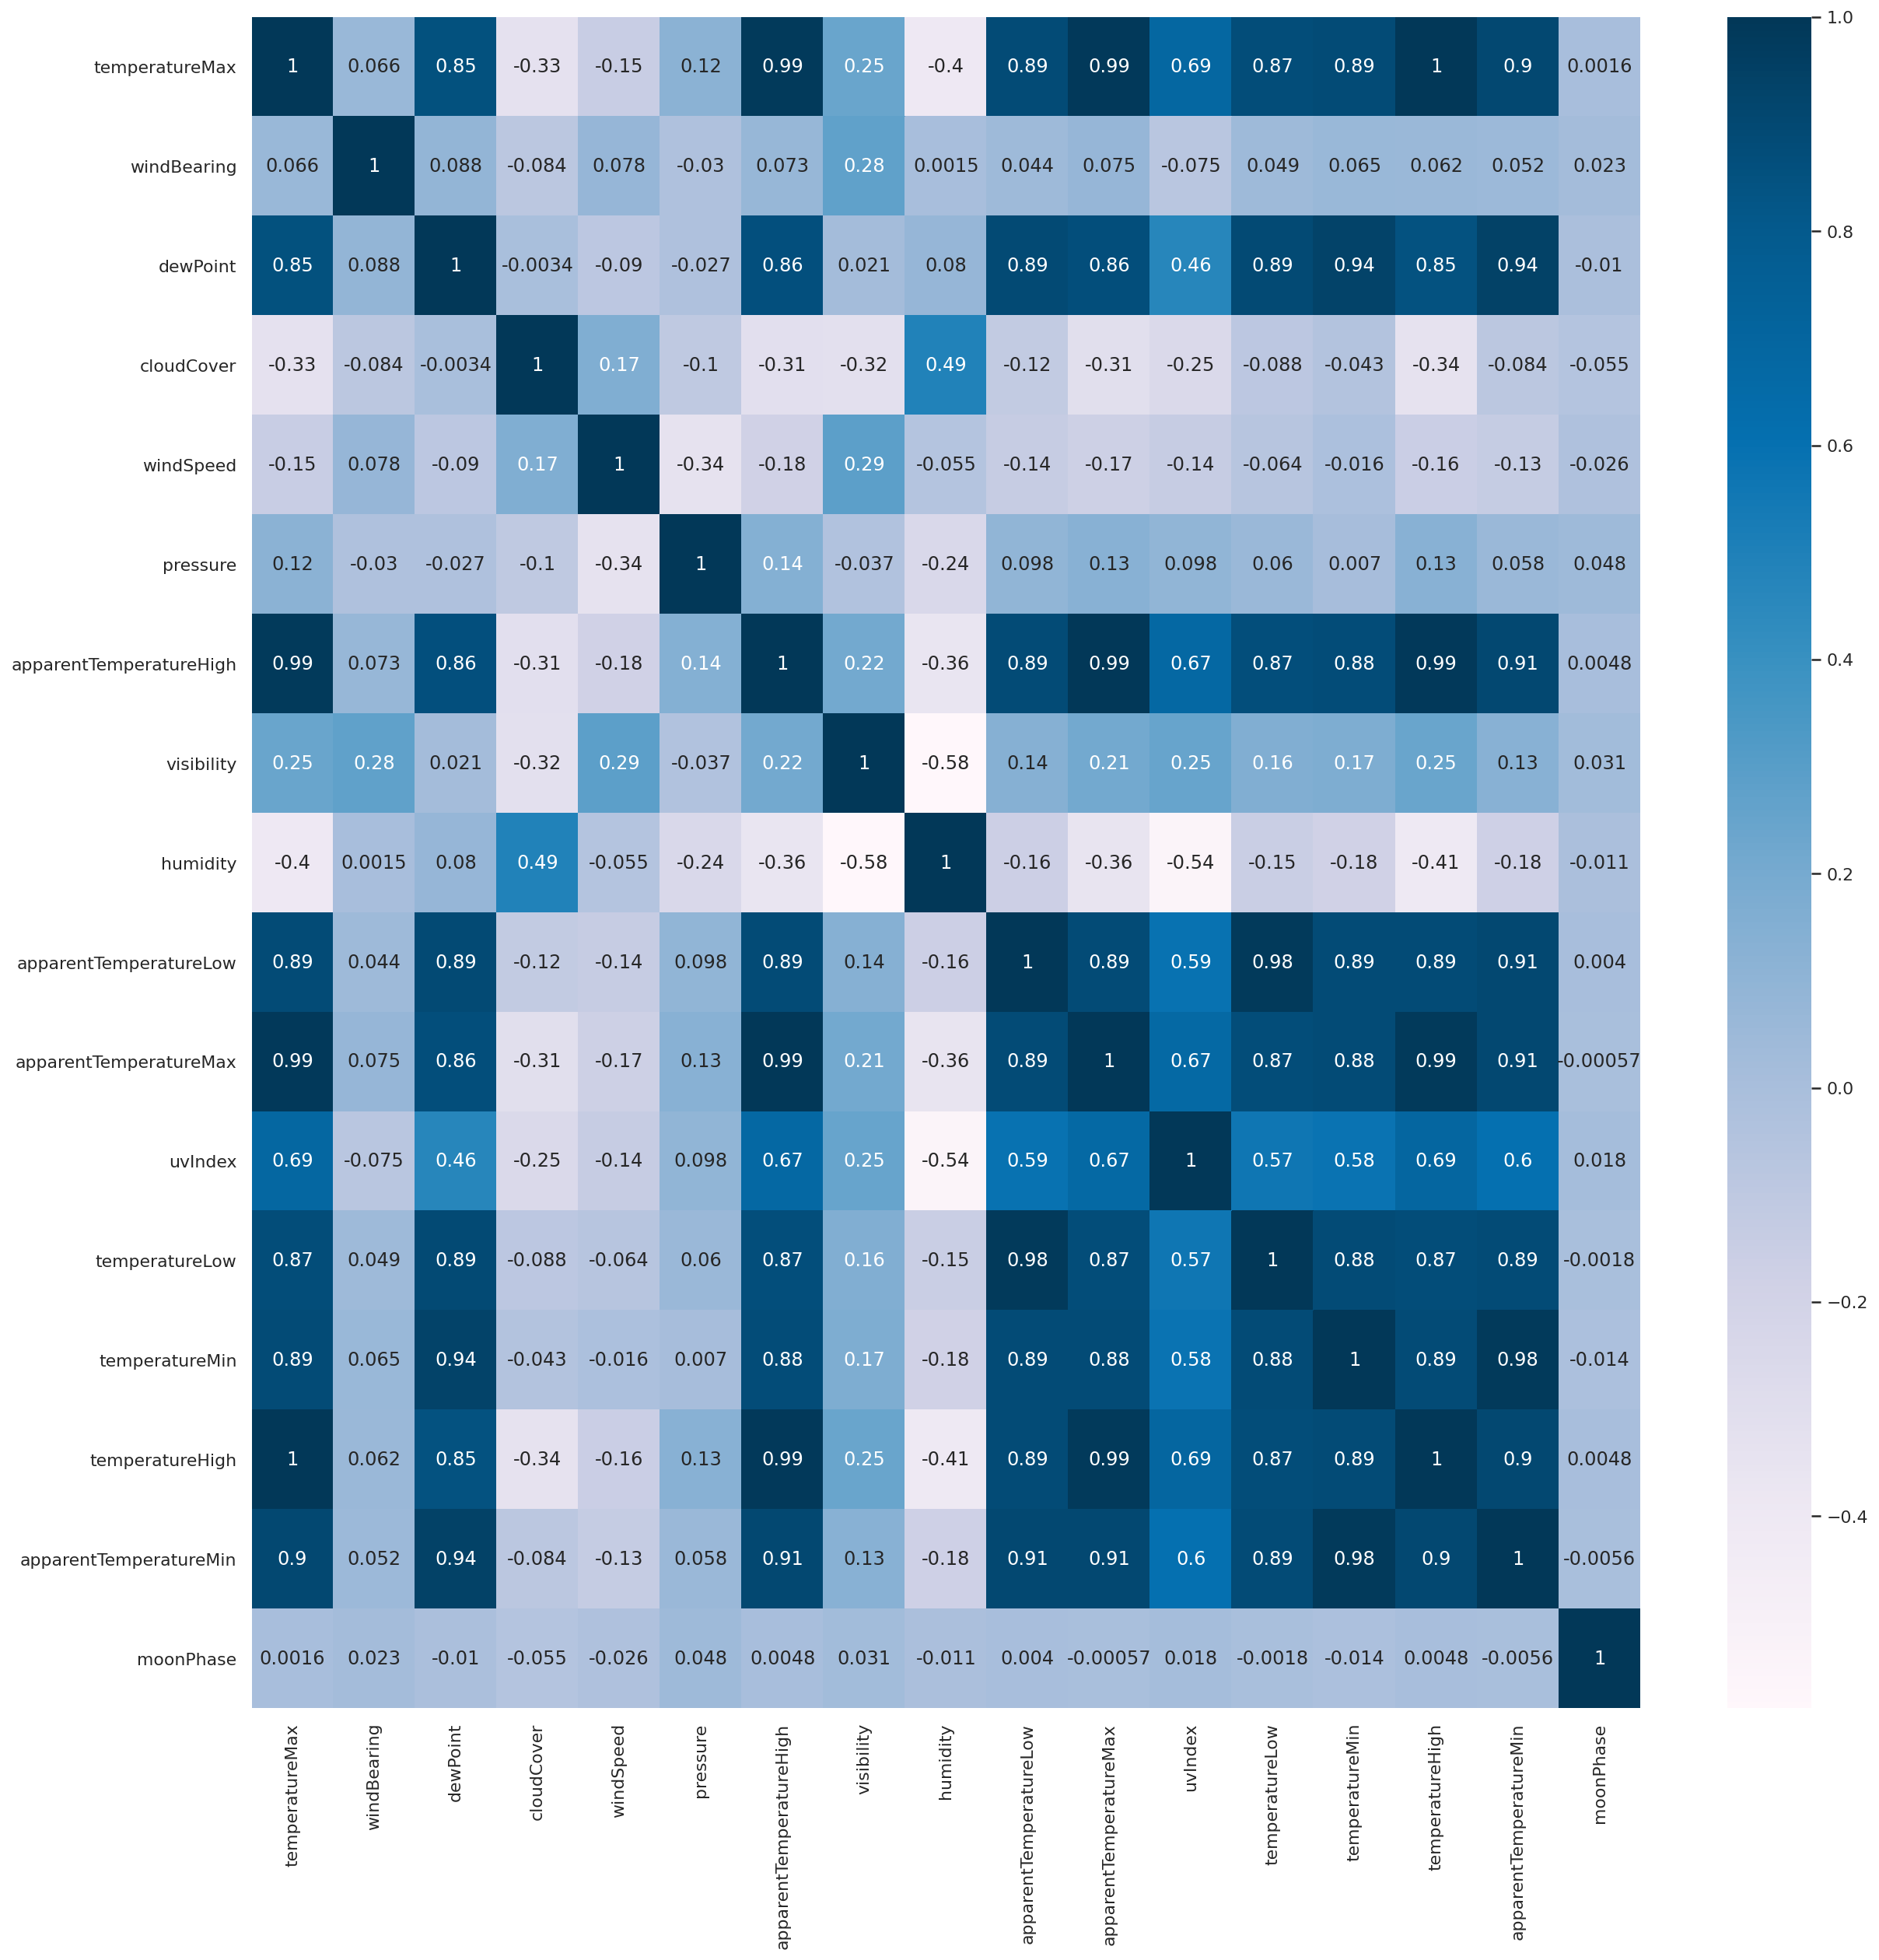

In [ ]:
# Plot numeric features correlation heat map
def show_correlation_heatmap(dataframe):
    plt.figure(figsize=(20,20))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
    plt.show()
show_correlation_heatmap(df_weather)

In [ ]:
# Prepare ploting dataset
df_weather_plot = df_weather[["time", "temperatureMax", "temperatureMin", "windBearing", "windSpeed", "cloudCover", "pressure", "visibility", "humidity", "icon", "precipType", 'moonPhase', 'sunriseTime', 'sunsetTime']]

In [ ]:
df_weather_plot.head()

,time,temperatureMax,temperatureMin,windBearing,windSpeed,cloudCover,pressure,visibility,humidity,icon,precipType,moonPhase,sunriseTime,sunsetTime
0,2011-11-11 00:00:00,11.96,8.85,123,3.88,0.79,1016.08,3.30,0.95,fog,rain,0.52,2011-11-11 07:12:14,2011-11-11 16:19:21
1,2011-12-11 00:00:00,8.59,2.48,198,3.94,0.56,1007.71,12.09,0.88,partly-cloudy-day,rain,0.53,2011-12-11 07:57:02,2011-12-11 15:52:53
2,2011-12-27 00:00:00,10.33,8.03,225,3.54,0.85,1032.76,13.39,0.74,partly-cloudy-day,rain,0.10,2011-12-27 08:07:06,2011-12-27 15:57:56
3,2011-12-02 00:00:00,8.07,2.56,232,3.00,0.32,1012.12,11.89,0.87,wind,rain,0.25,2011-12-02 07:46:09,2011-12-02 15:56:17
4,2011-12-24 00:00:00,8.22,3.17,252,4.46,0.37,1028.17,13.16,0.80,partly-cloudy-night,rain,0.99,2011-12-24 08:06:15,2011-12-24 15:55:55


In [ ]:
# Convert timestamp to date
# Convert sunriseTime and sunsetTime to hour of the day
df_weather_plot['date'] = pd.to_datetime(df_weather_plot['time'])
df_weather_plot['date'] = df_weather_plot['date'].dt.date
df_weather_plot['sunriseTime'] = pd.to_datetime(df_weather_plot['sunriseTime'])
df_weather_plot['sunriseHour'] = df_weather_plot['sunriseTime'].dt.hour
df_weather_plot['sunriseMinute'] = df_weather_plot['sunriseTime'].dt.minute
df_weather_plot['sunriseTime'] = (df_weather_plot['sunriseHour'] * 60 + df_weather_plot['sunriseMinute']) / 60
df_weather_plot['sunsetTime'] = pd.to_datetime(df_weather_plot['sunsetTime'])
df_weather_plot['sunsetHour'] = df_weather_plot['sunsetTime'].dt.hour
df_weather_plot['sunsetMinute'] = df_weather_plot['sunsetTime'].dt.minute
df_weather_plot['sunsetTime'] = (df_weather_plot['sunsetHour'] * 60 + df_weather_plot['sunsetMinute']) / 60
df_weather_plot = df_weather_plot[["date", "temperatureMax", "temperatureMin", "windBearing", "windSpeed", "cloudCover", "pressure", "visibility", "humidity", "icon", "precipType", 'moonPhase', 'sunriseTime', 'sunsetTime']]

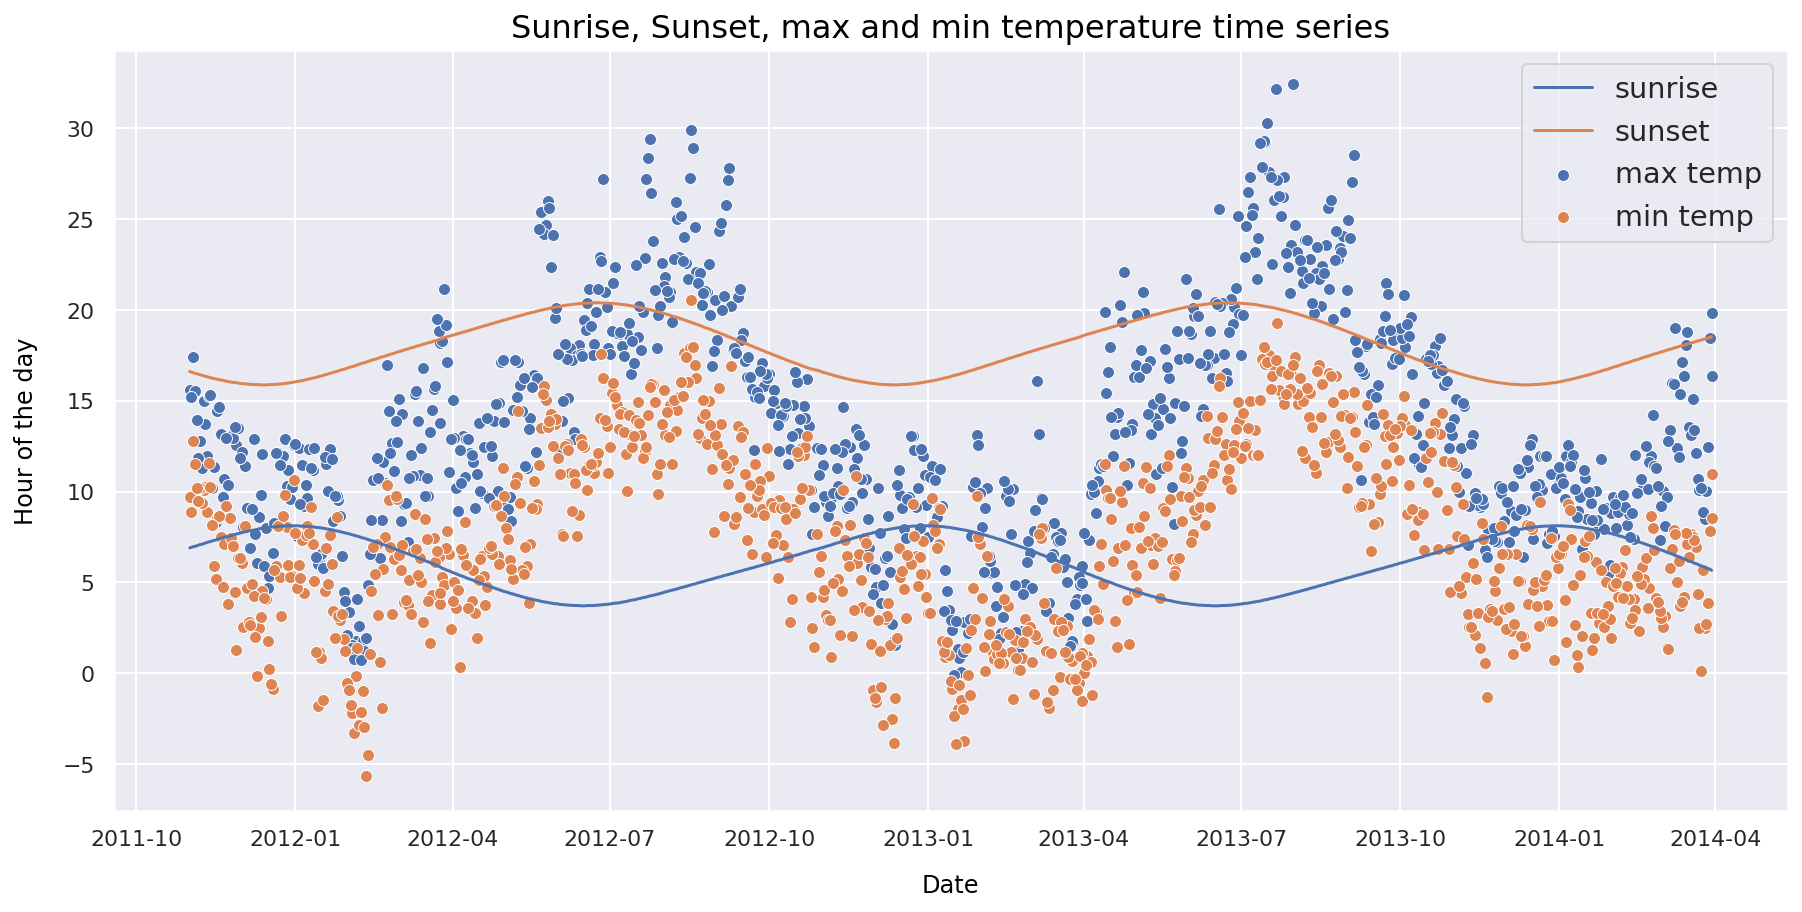

In [ ]:
# Plot sunriseTime, sunsetTime, temperatureMax and temperatureMin time series
plt.figure(figsize=(15,7))
sns.lineplot(x='date', y='sunriseTime',data=df_weather_plot, label='sunrise')
sns.lineplot(x='date', y='sunsetTime',data=df_weather_plot, label='sunset')
sns.scatterplot(x='date', y='temperatureMax',data=df_weather_plot, label='max temp')
sns.scatterplot(x='date', y='temperatureMin',data=df_weather_plot, label='min temp')
plt.xlabel("Date", fontsize=12,labelpad=12,color='black')
plt.ylabel("Hour of the day", fontsize=12,labelpad=12,color='black')
plt.title("Sunrise, Sunset, max and min temperature time series",fontsize=16, color='black')
plt.legend(loc='best', fontsize='large')
plt.show()

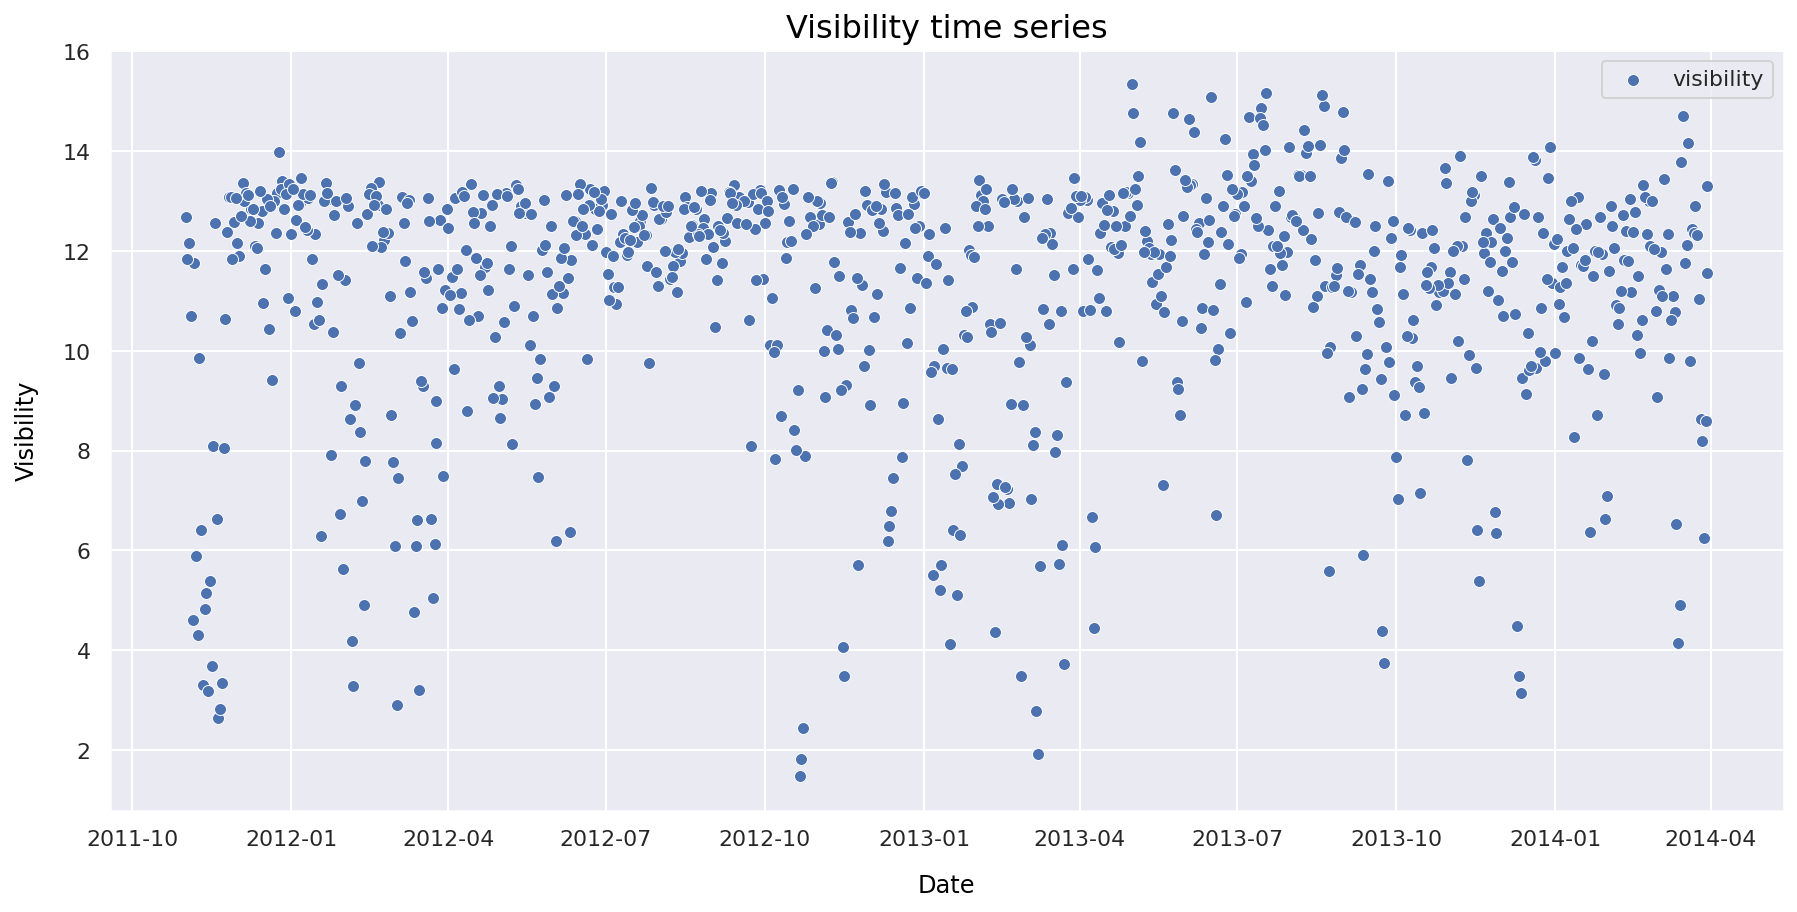

In [ ]:
# Plot visibility time series
plt.figure(figsize=(15,7))
sns.scatterplot(x='date', y='visibility',data=df_weather_plot, label='visibility')
plt.xlabel("Date", fontsize=12,labelpad=12,color='black')
plt.ylabel("Visibility", fontsize=12,labelpad=12,color='black')
plt.title("Visibility time series",fontsize=16, color='black')
plt.show()

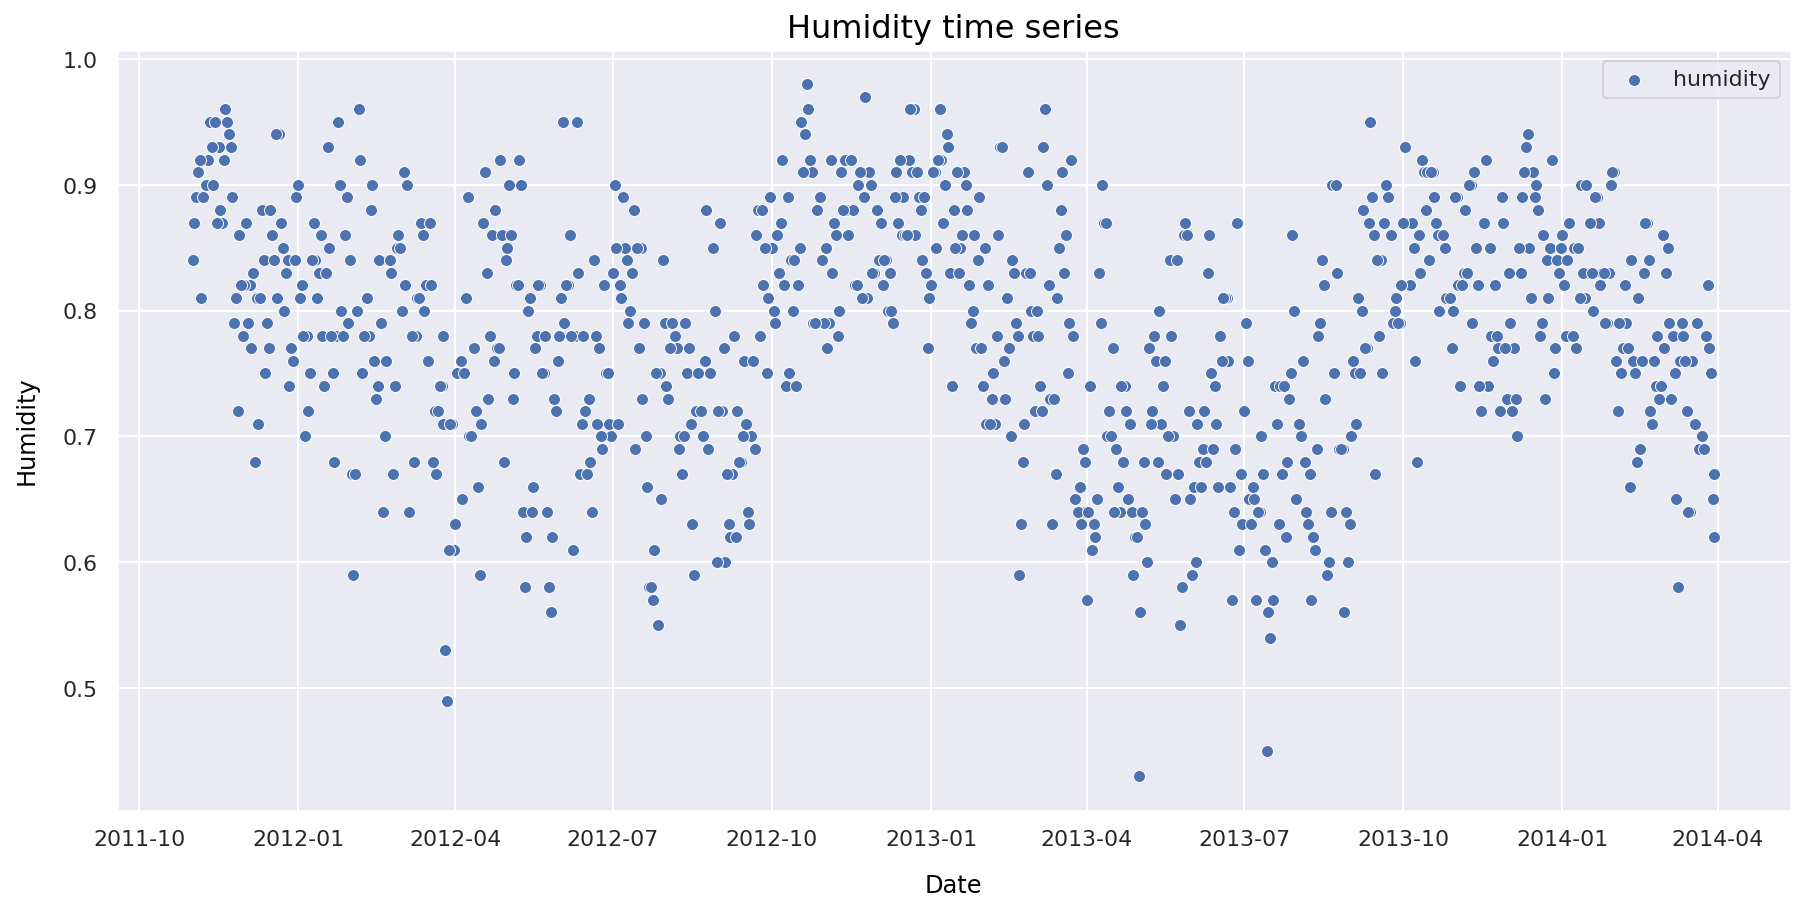

In [ ]:
# Plot humidity time series
plt.figure(figsize=(15,7))
sns.scatterplot(x='date', y='humidity',data=df_weather_plot, label='humidity')
plt.xlabel("Date", fontsize=12,labelpad=12,color='black')
plt.ylabel("Humidity", fontsize=12,labelpad=12,color='black')
plt.title("Humidity time series",fontsize=16, color='black')
plt.show()

In [ ]:
# Save final deliveravle dataset
df_weather_final = df_weather_plot.drop(['sunriseTime', 'sunsetTime'], axis=1)
df_weather_final.to_csv(os.path.join(base_dir, "weather.csv"), sep=',', index=False, encoding='utf-8')

In [ ]:
# Present final deliveravle dataset
df_weather_final.head()

,date,temperatureMax,temperatureMin,windBearing,windSpeed,cloudCover,pressure,visibility,humidity,icon,precipType,moonPhase
0,2011-11-11,11.96,8.85,123,3.88,0.79,1016.08,3.30,0.95,fog,rain,0.52
1,2011-12-11,8.59,2.48,198,3.94,0.56,1007.71,12.09,0.88,partly-cloudy-day,rain,0.53
2,2011-12-27,10.33,8.03,225,3.54,0.85,1032.76,13.39,0.74,partly-cloudy-day,rain,0.10
3,2011-12-02,8.07,2.56,232,3.00,0.32,1012.12,11.89,0.87,wind,rain,0.25
4,2011-12-24,8.22,3.17,252,4.46,0.37,1028.17,13.16,0.80,partly-cloudy-night,rain,0.99
